# Hito 2
**Nombres:** Gonzalo Sobarzo, Hernán Ulloa, Alexander Reisenegger, Ignacio Huenchumil.

**Fecha:** Noviembre 2022

**Grupo:** 11

**Curso:** CC5205

**Cuerpo docente:** Andres Abeliuk, Hernán Sarmiento,  Cinthia Sánchez, Jorge Ortiz

# Introducción
Como equipo buscamos una base de datos de música para así llevar a cabo un estudio de datos para poder predecir (y corroborar) distintos comportamientos de los consumidores de música, como por ejemplo, buscar potenciales hits sabiendo la trayectoria del artista o tal vez un posible remix al ver la popularidad de la canción original de modo que se estudiaran distintas influencia de los atributos de las canciones en su éxito.

Nuestra base de datos consta de distintos premios y certificaciones para canciones, albumes, artistas y a su vez cuanto tiempo se mantuvo popular, de modo que solo se muestran canciones que sean éxitos del momento tanto en spotify como en la lista de billboard, esto sera útil para poder predecir distintos atributos de una canción o artista y así enfocar nuestro proyecto al análisis de tendecias musicales.



# Exploración de datos
El dataset consiste de 8 tablas (fuente del dataset:https://www.kaggle.com/datasets/danield2255/data-on-songs-from-billboard-19992019), una que contiene datos de las canciones que aparecen en la lista billboard 100 cada semana desde 1999 hasta 2019, incluyendo datos como el título, los artistas, los géneros de la cancion, artistas invitados y cuántas semanas ha pasado en el top hasta la fecha, y tabién una tabla que contiene datos de cada artista que ha aparecido en esa lista en dicho período de tiempo. También incluye 2 listas de los premios Grammy en el mismo intervalo de tiempo, una sobre canciones y una sobre los álbumes. Además una tabla de singles y una de álbumes según su certificación RIAA, también en el mismo período (certifica cuántas copias vendieron, por ejemplo certificación diamante, platino, multi platino, oro, diamante varias veces, entre otros). Por último hay 2 tablas de las canciones más populares de spotify desde 2016 hasta 2019, también semanales. Una tiene los datos generales del top 200 semanal como la cantidad de reproducciones y el nombre entre otros, y la otra tiene atributos para cada canción como por ejemplo energía, si está en modo mayor o menor, bailabilidad, etc.

Hay múltiples dudas que se puede plantear al respecto, por ejemplo la canción Radioactive de Imagine Dragons pasó casi 2 años en el Billboard 100, y sería interesante analizar por qué una canción mantiene su popularidad, mientras otras sólo se quedan en la fama por un corto período.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
artistDf = pd.read_csv('data/artistDf.csv')
spotifyWeeklyTop = pd.read_csv('data/spotifyWeeklyTop200Streams.csv')
songAttributes = pd.read_csv('data/songAttributes_1999-2019.csv')
grammySongs = pd.read_csv('data/grammySongs_1999-2019.csv', sep = ';')
billboardHot100 = pd.read_csv('data/billboardHot100_1999-2019.csv')

In [2]:
songAttributes.drop(['Unnamed: 0'], axis =1)

,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154926,0.333000,No.6 Collaborations Project,Ed Sheeran,0.747,200733,0.649,False,0.000000,0.1720,-6.218,0,Nothing On You (feat. Paulo Londra & Dave),80,0.2190,88.011,4,0.840
154927,0.314000,No.6 Collaborations Project,Ed Sheeran,0.469,204507,0.631,False,0.000000,0.1400,-6.569,0,I Don't Want Your Money (feat. H.E.R.),74,0.0853,91.418,4,0.763
154928,0.467000,No.6 Collaborations Project,Ed Sheeran,0.778,212307,0.590,False,0.000000,0.0902,-5.548,1,1000 Nights (feat. Meek Mill & A Boogie Wit da...,75,0.2700,97.995,4,0.515
154929,0.110000,No.6 Collaborations Project,Ed Sheeran,0.726,190293,0.731,False,0.000003,0.0928,-6.304,0,Way To Break My Heart (feat. Skrillex),73,0.1590,170.125,4,0.430


En la siguiente tabla se ve que Imagine Dragons Paso 87 semanas en el Chart:

In [3]:
songs = billboardHot100.drop_duplicates(subset = ['Artists', 'Name'])
songs.sort_values(by = ['Weeks.on.chart'], ascending = False).head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
25705,25706,Imagine Dragons,Radioactive,49,3.0,87.0,2014-05-09,"February 14, 2012","Adult Alternative,Dubstep,Alternative Pop,Alte...","Imagine dragons, Daniel platzman, Wayne sermon...",Radioactive \nWhoah-oh\nWhoah-oh\nWhoah-oh\nWh...,NaN
26334,26335,AWOLNATION,Sail,45,17.0,79.0,2014-03-21,"November 8, 2010","Electro-Pop,Pop-Rock,Alternative Rock,Industri...",Aaron bruno,Sail \nSail!\nThis is how I show my love\nI ma...,NaN
48082,48083,Jason Mraz,I'm Yours,48,6.0,76.0,2009-10-08,"April 15, 2008","Adult Contemporary,Adult Alternative,Pop-Rock,...",Jason mraz,I'm Yours \nWell you done done me and you bet ...,NaN
23559,23560,OneRepublic,Counting Stars,50,2.0,68.0,2014-10-17,"March 25, 2013","Folk Rock,Rock,Pop,Electro-Pop,Folk,Pop-Rock",Ryan tedder,"Counting Stars \nLately, I've been, I've been ...",NaN
35793,35794,Adele,Rolling In The Deep,49,1.0,65.0,2012-04-13,"November 29, 2010","Pop,Blues,Adult Alternative,Adult Contemporary...","Paul epworth, Adele",Rolling in the Deep \nThere's a fire starting ...,NaN


En esta tabla se puede ver una descripción de cada artista

In [4]:
print(artistDf.shape)#dimensión de la tabla de los distintos artistas.
artistDf.head()

(1035, 8)


,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo
2,2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group
3,3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",11,2010,M,Solo
4,4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo


Tabla de datos con el top 5 de spotify la semana del 20 de julio de 2018

In [527]:
print(spotifyWeeklyTop.shape) #dimensión de la tabla de canciones semanales en spotify.
spotifyWeeklyTop.head()

(26395, 6)


,Unnamed: 0,Name,Artist,Features,Streams,Week
0,0,In My Feelings,Drake,NaN,30747676,2018-07-20
1,1,Lucid Dreams,Juice WRLD,NaN,12930705,2018-07-20
2,2,Nonstop,Drake,NaN,12312859,2018-07-20
3,3,God is a woman,Ariana Grande,NaN,10771324,2018-07-20
4,4,SAD!,XXXTENTACION,NaN,10503061,2018-07-20


Tabla de datos con el top 5 de Billboarhot100 la semana del 6 de julio de 2019

In [6]:
print(billboardHot100.shape)#dimensión de la tabla de las canciones en el billboard.
billboardHot100.head()

(97225, 12)


,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN


In [7]:
dicc = {}
i = 0
for row, col in songs.iterrows():
    aux = col['Genre'].split(',')
    for k in aux:
        if k in aux:
            dicc[k] = dicc.get(k,0) + 1
        i+=1



In [8]:
gen = pd.DataFrame([[key, dicc[key]] for key in dicc.keys()], columns=['Genre', 'Frequency'])

In [9]:
gen1_5 = gen.sort_values(by = ['Frequency'], ascending=False)
gen1_5.shape

(334, 2)

En total hay 334 generos, por lo que conviene filtrar los 20 mas populares para el gráfico

In [10]:
gen2 = gen1_5.head(20)
gen2

,Genre,Frequency
9,Pop,2994
8,Rap,2465
46,Rock,1538
30,R&;B,1335
0,Country,1255
4,Trap,563
24,Pop-Rock,428
41,Alternative Rock,364
33,Soundtrack,357
20,Canada,327


En este gráfico de tablas se pueden ver los géneros mas recurrentes en el billboard top 100:

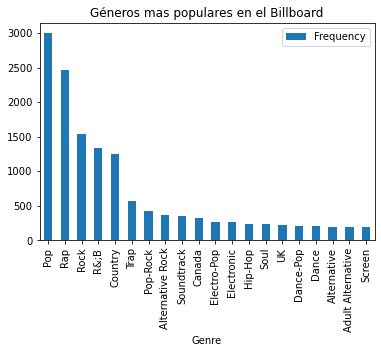

In [11]:
ax = gen2.plot.bar(x='Genre', y = 'Frequency', stacked=True, title = "Géneros mas populares en el Billboard")

En esta tabla se pueden ver los premios grammy del 2018:

In [12]:
print(grammySongs.shape)#dimensión de la tabla de canciones ganadora de los grammy's.
grammySongs.head()

(428, 7)


,Column1,X,GrammyAward,GrammyYear,Genre,Name,Artist
0,1,0,Record Of The Year,2018,General,this is America,Childish Gambino
1,2,1,Song Of The Year,2018,General,this is America,Childish Gambino
2,3,2,Best Pop Solo Performance,2018,Pop,Joanne (where Do you Think You're Goin'?),Lady Gaga
3,4,3,Best Pop Duo/Group Performance,2018,Pop,Shallow,Lady Gaga & Bradley Cooper
4,5,4,Best Dance Recording,2018,Dance/Electronic Music,Electricity,Silk City & Dua Lipa Featuring Diplo & Mark Ro...


En esta tabla se muestran los artistas con mayor número de seguidores en spotify:

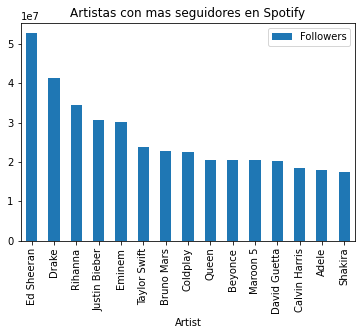

In [13]:
artist_p = artistDf.sort_values(by = ['Followers'], ascending=False)
artist_p = artist_p.head(17)
artist_p = artist_p.drop([769, 828]) #elimina play y cold, ya que eran versiones repetidas de coldplay
ax = artist_p.plot.bar(x= 'Artist', y = 'Followers', stacked= True, title = "Artistas con mas seguidores en Spotify")

La siguiente matriz de correlación muestra como se comparan las variables de los artistas en spotify:

<AxesSubplot:>

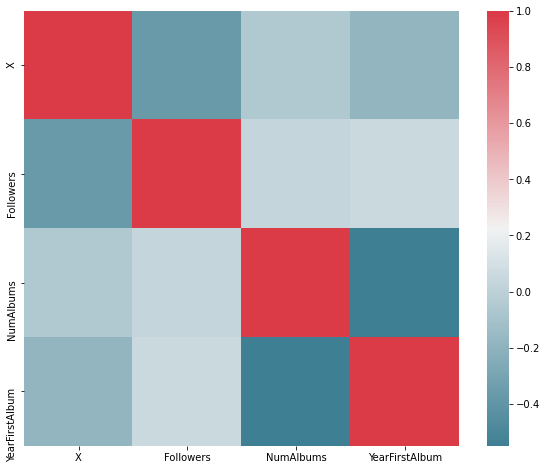

In [14]:
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
f, ax = pl.subplots(figsize=(10, 8))
corr = artistDf.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

En el siguiente gráfico se observa que el artista que tiene más grammy's por canciones es Adele y la banda con más premios es U2:

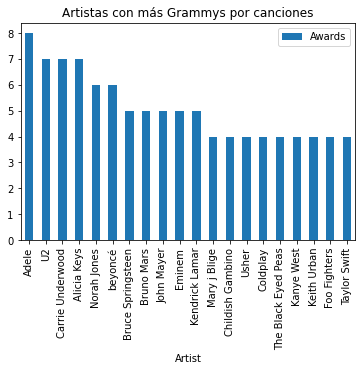

In [15]:
winners = grammySongs.loc[:, ['Artist']]
gen3 = winners.groupby(winners.columns.tolist(),as_index=False).size().rename(columns={'size':'Awards'})
gen4 = gen3.sort_values(by = ['Awards'], ascending=False).head(20)
grs = gen4.plot.bar(x= 'Artist', y = 'Awards', stacked= True, title = 'Artistas con más Grammys por canciones')


El siguiente diagrama de cajas representa la distribución de los atributos,  filtrados por las canciones que aparecen en la tabla de billboard 100:

(3193, 28)


<AxesSubplot:title={'center':'Distribucion de los atributos de las canciones más populares'}>

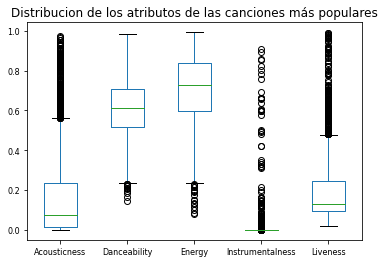

In [16]:

songAttributes1 = songAttributes.rename(columns = {"Artist" : "Artists"})
songAttributes1.head()
sa = (
    songAttributes1.merge(billboardHot100, 
              on=['Name', 'Artists'],
              how='left', 
              indicator=True)
    .query('_merge == "both"')
    .drop(columns='_merge')
)
sa = sa.drop_duplicates(subset = ["Name", "Artists"])
print(sa.shape)
sa.iloc[:,[1, 4, 6, 8, 9]].plot.box(stacked=True, fontsize = 8, title = "Distribucion de los atributos de las canciones más populares")



Tabla de los atributos de canciones que estuvieron alguna vez en el Billboard:

In [17]:
sa.head()

,Unnamed: 0_x,Acousticness,Album,Artists,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,...,Unnamed: 0_y,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
59,59,0.000877,Dosage,Collective Soul,0.547,173267,0.902,False,0.000563,0.0839,...,97222.0,96.0,73.0,20.0,1999-07-12,NaN,"Hockey,Gaming,Soundtrack,Rock",Collective soul,Heavy \nComplicate this world you wrapped for ...,NaN
185,33,0.587000,Live At Open Air Gampel (2004),Everlast,0.316,396896,0.634,False,0.000019,0.9070,...,96997.0,47.0,13.0,33.0,1999-07-26,NaN,"Rap,Rock",Everlast,What It's Like \nWe've all seen the man at the...,NaN
328,20,0.028100,Something In The Air,Lila McCann,0.644,212360,0.785,False,0.000001,0.0996,...,96948.0,92.0,41.0,19.0,1999-08-02,NaN,Pop,NaN,With You \nLast night I couldn't sleep\nI foun...,NaN
356,0,0.055200,Jordan Knight,Jordan Knight,0.830,289760,0.655,False,0.000001,0.0567,...,96858.0,91.0,10.0,20.0,1999-08-09,NaN,Pop,"Jimmy jam, Robin thicke, Terry lewis, Jordan k...",Give It to You \nYou say it's been too long\nS...,NaN
842,34,0.046400,Terry Dexter (U.S. Version),Terry Dexter,0.546,242347,0.618,False,0.000000,0.0298,...,96775.0,99.0,NaN,NaN,1999-08-16,NaN,Pop,NaN,"Better Than Me \nBoy, I got my eyes on you\nGu...",NaN


A su vez una tabla con los valores independientes

In [18]:
print(songAttributes.shape)#dimensión de la tabla song attributes.
songAttributes.head()

(154931, 18)


,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666


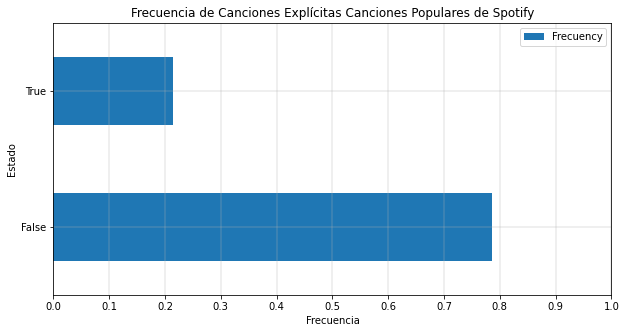

In [19]:
explicit = songAttributes.Explicit.value_counts(normalize=True)
df2 = pd.DataFrame([
                    ["False",explicit[0]],
                    ["True",explicit[1]]
                    ],
                    columns=["State","Frecuency"])


ax  = df2.plot.barh(x = "State", y = "Frecuency", xticks = [k/10 for k in list(range(11))], figsize = (10,5))
ax.set(xlabel = "Frecuencia", ylabel = "Estado", title = "Frecuencia de Canciones Explícitas Canciones Populares de Spotify")
ax.grid(linestyle='-', linewidth=0.4)
plt.show()

# Preguntas y problemas

Preguntas y problemas
 Despues de haber analizando y planteado las tablas con sus respectivos datos sabemos que todas las tablas poseen una medida de popularidad, alcance o ventas, que miden la influencia de la canción artista y/o album, al mismo tiempo se puede ver que estos rankings son distintos ya que spotify tiene una base de datos distinta a las demas tablas (Billboard's, Grammy's) Por lo cual podemos manejarnos entre las tablas midiendo la popularidad con las siguientes preguntas:
 
- ¿Que hace que ciertos géneros musicales se mantengan mas tiempo con popularidad?

Hay Géneros que se mantienen atemporales y siempre figuran en los charts en el transcurso de los 20 años que se registran como es el caso del POP que es el que aparece más veces en la base de datos.

- ¿Qué genero musical llegará al top 1 del Billboard la semana del 13 de Julio del 2019?

El objetivo es estudiar basado en los top anteriores ver si hay algún patrón que permita predecir el género musical de la próxima canción en llegar al primer puesto.

- ¿Qué conjunto de atributos extraídos de las canciones, representa de mejor manera las diferencias entre géneros? 

El objetivo de esta pregunta es ver como las canciones pertenecientes a ciertos géneros se diferencian de otras de otros géneros musicales.

# Metodologías Preguntas

>Pregunta 1: Planteamos la pregunta de modo que se puedan agrupar distintas características de los géneros mediante clustering para poder asi encontrar patrones que poseen los géneros con mayor cantidad de apariciones en el chart del billboard y los patrones que poseen los géneros que no perduran en este último, para asi comparar estos atributos y determinar si existen ciertos patrones convincentes para determinar canciones que perduren en el billboard y/o tengan un mayor número de apariciones
de modo que se agruparan las tablas de los billboardhot100, songatributes, grammyawards y ArtistDF para tener distintas agrupaciones posibles para analizar der forma más efectiva los datasets.


In [ ]:
# J_table = billboardHot100.drop_duplicates(subset = ['Name'])
# JT = (
#     songAttributes.merge(J_table, 
#               on=['Name', 'Artist'],
#               how='left', 
#               indicator=True)
#     .query('_merge == "both"')
#     .drop(columns='_merge')
# )
# a=JT.drop(columns=("Album"))
# b=a.drop(columns=("Unnamed: 0_x"))
# c=b.drop(columns=('Unnamed: 0_y'))
# d=c.drop(columns=('Lyrics'))
# e=d.drop(columns=('Writing.Credits'))
# f=e.drop(columns=('Features'))



# #JT_2 = (
# #    artistDf.merge(f, 
#  #             on=['Followers', 'Artist'],
#   #            how='left', 
#    #           indicator=True)
#     #.query('_merge == "both"')
#     #.drop(columns='_merge')
# #)
# #g=f.drop(columns=('Features'))
# #h=g.drop(columns=('Features'))
# #i=h.drop(columns=('Features'))
# f.sort_values(by = ['Weeks.on.chart'], ascending = False).columns

>Pregunta 2: El objetivo de la pregunta es entrenar un clasificador que permita encontrar patrones y predecir el comportamiento del billboard para así encontrar la canción top 1 de una semana, y de ésta manera predecir la semana siguiente a la última del dataset. Se puede probar con distintos algoritmos de clasificación y usar gridSearchCV para encontrar el mejor algoritmo y los mejores parámetros que permitan predecirla. También se puede utilizar cross validation para entrenar el clasificador con distintos subconjuntos y así iterar para obtener mejores resultados. Para no utilizar tantos géneros distintos y extraños, se considerarán los 20 géneros más populares en el Billboard y se seleccionará uno de éstos para cada canción. La tabla donde se realizará la predicción será una tabla que contendrá, por cada semana, los datos de todas las 100 canciones del billboard hot 100 de la semana anterior, y la clase de género de la canción top 1 de la semana.

In [ ]:
billboardHot100.head(5)

In [ ]:
study_table = billboardHot100
genres = study_table.Genre.str.split(',', expand = True)
genres_list = gen2['Genre'].head(15).to_numpy()

genres2 = genres.dropna(axis = 1)
genres2.columns = ['gen']
normal_genres = ['Rap', 'Pop', 'Rock', 'Alternative', 'Dance', 'Country', 'Hip-Hop', 'Electronic', 'Electro', 'R&;B']
for i, row in genres.iterrows():
    for j in row:
        if j in genres_list:
            genres2.at[i, 'gen'] = j
            break
        else:
            for word in normal_genres:
                word2 = word
                word2.lower()
                if j.find(word)!=-1 or j.find(word2)!=-1:
                    genres2.at[i, 'gen'] = word
                    break
            break
genres2


In [ ]:

genres3 = genres2.groupby(genres2.columns.tolist(),as_index=False).size().rename(columns={'size':'count'})
genres3 = genres3.sort_values(by = "count", ascending = False)
genres3 #para analizar los datos de genres2

In [ ]:
billboardHot100.head(1)

In [ ]:
#7-06-2019 top100genero, top100nombre, top100artista..., top99genero...  top1genero (no anhadir nada mas del top1)
billboardColumns = ['Artists', 'Name', 'Weeks.on.chart', 'Date' ,'Genre']
columnas = ['semana', 'top1prediccion']
for i in range(1, 101):
    for name in billboardColumns:
        string ='top' + str(i) + name
        columnas.append(string)
weeks = pd.DataFrame(billboardHot100['Week'])
weeks = weeks.drop_duplicates( subset = ["Week"], ignore_index = True)
weeks = weeks['Week']

tablaPrediccion = pd.DataFrame(columns = columnas)
print(weeks.shape)
print(tablaPrediccion.shape)
for i in range(len(weeks)-1):
    currentWeek = weeks[i]
    data = [currentWeek]
    oldWeek = weeks[i+1]
    for  row in billboardHot100.itertuples():
        j = row.Index
        if(row.Week == currentWeek and row._4==1):
            data.append(genres2.at[j, 'gen'])
        if(row.Week == oldWeek):
            for word in billboardColumns:
                if word!='Genre':
                    data.append(billboardHot100.at[j, word])
                else:
                    data.append(genres2.at[j, 'gen'])
    while(len(data) < 502):
        data.append("None")
    tablaPrediccion.loc[len(tablaPrediccion)] = data

tablaPrediccion

In [ ]:
#limpieza de datos de la tabla generada, ya que en la tabla original faltan algunos top 1
genresmaximos = genres3['gen'].to_numpy()
tablaPrediccion2 = tablaPrediccion[tablaPrediccion.top1prediccion.isin(genresmaximos)]
tablaPrediccion2

>Pregunta 3: Como la tabla de 'songAttributes' no tiene el atributo de género musical de la canción, se utiliza la tabla de 'artistDf' que contienen informarción de los artistas incluyendo su género musical. la idea es generar cluster's que en teoría deberían agruparse según géneros musicales por lo primero se evaluará la pureza de estos, por lo que se usáran distintas formas de hacer cluster's, es decir, se usarán métodos como k-means, los dendogramas, etc. Si no se obtienen cluster's puros se procederá con subconjuntos de atributos para así encontrar donde más se diferencian los géneros musicales. Para facilitar el estudio de esto se tomarán los géneros musicales que aparecen primero en la tabla de 'artistDf' y posteriormente mediante clustering dar etiquetas más claras a cada canción.

## Data cleaning

In [478]:
songAttributes.head(2)

,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408


In [479]:
artistDf.head(2)

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo


Se procede a crear el dataframe donde se trabajará agregando de 'aristDf' el género(s) músical de cada canción y dejando el parámetro 'Explicit' expresado de forma binaria:

In [615]:
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

data_cleaned = songAttributes.merge(artistDf.loc[:,['Artist', 'Genres']],
                                on = ['Artist'],
                                how = 'inner',
                                indicator = False)

data_cleaned = data_cleaned.drop(labels = ['Unnamed: 0'], axis = 1)
data_cleaned['Explicit'] = data_cleaned['Explicit'].astype(int)


idx = data_cleaned.columns.get_loc("Name")
columns = data_cleaned.columns.to_list()[idx:idx+1] + data_cleaned.columns.to_list()[1: idx] + data_cleaned.columns.to_list()[0:1] + data_cleaned.columns.to_list()[idx+1:] #webeo para cambiar el orden de columnas
data_cleaned = data_cleaned[columns]

data_cleaned_sample = data_cleaned.sample(n = 2000, replace = False, random_state= 27)



In [616]:
data_cleaned_sample.head(2)

,Name,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Acousticness,Popularity,Speechiness,Tempo,TimeSignature,Valence,Genres
105914,True Colors (Glee Cast Version),"Glee: The Music, The Complete Season One",Glee Cast,0.611,214000,0.387,0,0.0,0.2130,-7.949,1,0.1180,36,0.0242,85.978,4,0.335,"glee club,hollywood,pop,post-teen pop"
30003,No Soy El Aire,Habítame Siempre (Bonus Tracks Version),Thalia,0.362,246413,0.596,0,0.0,0.0755,-7.054,0,0.0369,41,0.0338,148.471,4,0.201,"dance pop,latin,latin pop,mexican pop,pop,trop..."


 Se eliminan atributos de texto que no pueden ser utilizados en KMeans como el nombre del artista, el nombre del albúm y el nombre de la canción por ser datos en forma de texto (lo mismo se hizo para cada metodología de clustering):

In [482]:
# se eliminan atributos de texto que no pueden ser utilizados en KMeans
data_k_means = data_cleaned_sample.drop(columns = ['Album','Artist', 'Name'])
data_k_means = data_k_means.drop(columns = ['Duration','Popularity','Tempo','TimeSignature','Genres'])

#normalización de valores numericos
def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())
    
# data_k_means = minmax_norm(data_k_means)


De esta forma se toma el conjunto [Danceability, Energy, Explicit, Instrumentalness, Liveness, Loudness, Mode, Acousticness, Speechiness, Valence] para hacer el clustering en K-means y el resto de los métodos:

In [483]:
data_k_means.head()

,Danceability,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Acousticness,Speechiness,Valence
105914,0.611,0.387,0,0.000000,0.2130,-7.949,1,0.1180,0.0242,0.335
30003,0.362,0.596,0,0.000000,0.0755,-7.054,0,0.0369,0.0338,0.201
36149,0.680,0.605,0,0.000094,0.3000,-6.745,1,0.2630,0.0258,0.677
14723,0.732,0.572,0,0.000000,0.1250,-7.426,1,0.3890,0.2950,0.816
76273,0.926,0.665,0,0.000000,0.0645,-4.866,0,0.1060,0.2600,0.220


In [484]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(data_k_means)
rates_pca = pca.transform(data_k_means)
rates_pca.shape

(2000, 2)

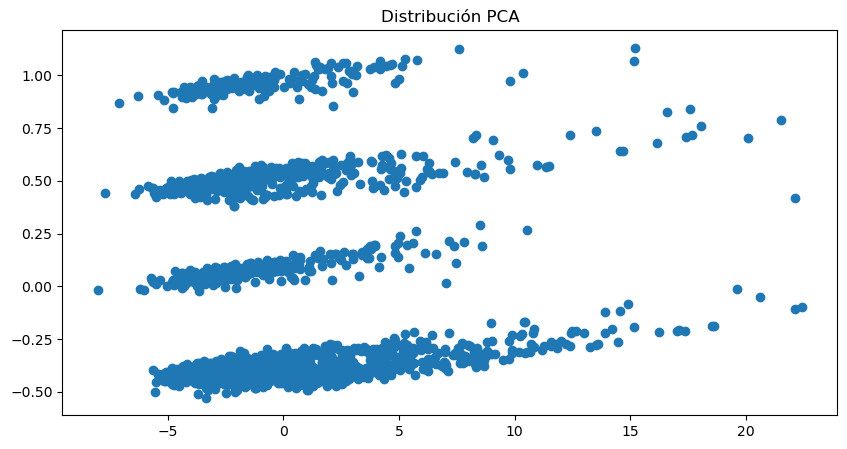

In [485]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
plt.scatter(rates_pca[:,0], rates_pca[:,1])
plt.title('Distribución PCA')
plt.show()

In [ ]:
OMP_NUM_THREADS=8
SSE = []
numClusters = list(range(1, 20))
for k in numClusters:
    k_means = KMeans(n_clusters=k, n_init=20, max_iter= 300, random_state=1)
    k_means.fit(data_k_means)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE, marker="o")
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

## K-means:

In [32]:

kmeans =  KMeans(n_clusters=4, n_init = 20, random_state=1)
kmeans.fit(data_k_means)
y_pred = kmeans.labels_
np.bincount(y_pred)

array([ 75, 673, 330, 922], dtype=int64)

Text(0.5, 1.0, "cluster's k = 4")

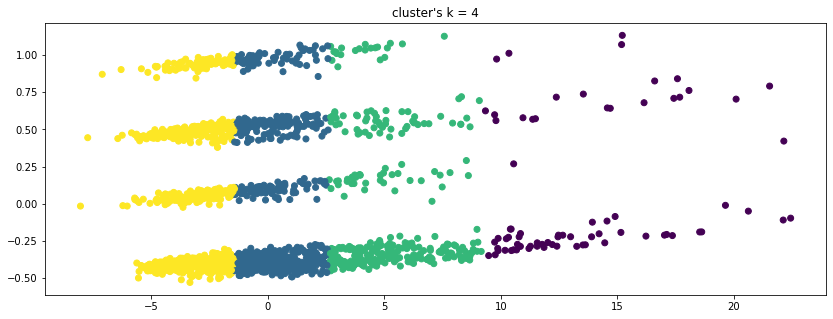

In [33]:
fig, ax = plt.subplots(sharex=True, figsize = (14,5))
plt.scatter(rates_pca[:, 0], rates_pca[:, 1], c= kmeans.labels_)
plt.title("cluster's k = 4")

## Clustering Jerárquico

In [621]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

names = data_cleaned_sample['Name']
Y = data_cleaned_sample['Genres']
X = data_cleaned_sample.drop(columns = ['Album','Artist', 'Name', 'Genres', 'Duration','Popularity','Tempo','TimeSignature'])

In [622]:
X.head(2)

,Danceability,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Acousticness,Speechiness,Valence
105914,0.611,0.387,0,0.0,0.2130,-7.949,1,0.1180,0.0242,0.335
30003,0.362,0.596,0,0.0,0.0755,-7.054,0,0.0369,0.0338,0.201


### WARD

[]

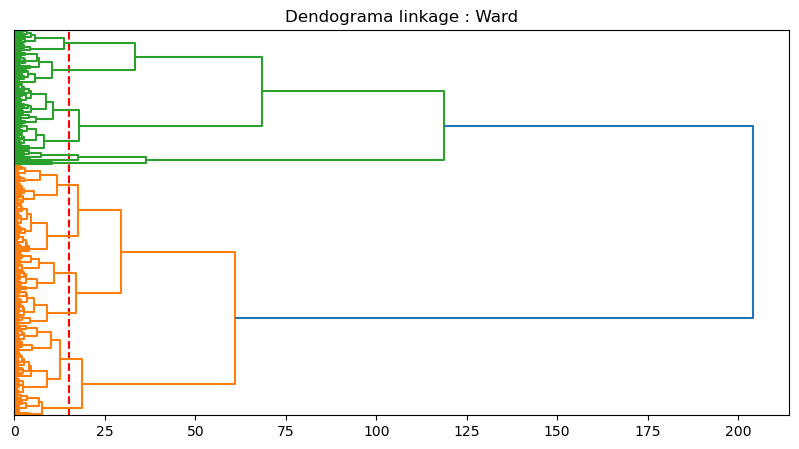

In [504]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
Z = linkage(X, method='ward', metric='euclidean') # distancia maxima entre putnos
plt.axvline(x= 15, color='r', linestyle='--')
dn = dendrogram(Z, labels = ['' for k in range(0,len(X))], orientation='right')
plt.title('Dendograma linkage : Ward')
plt.plot()

In [510]:
distance = 40

ward_euclidean = AgglomerativeClustering(linkage='ward',
                                affinity='euclidean',
                                n_clusters=None,
                                distance_threshold=distance).fit(X)

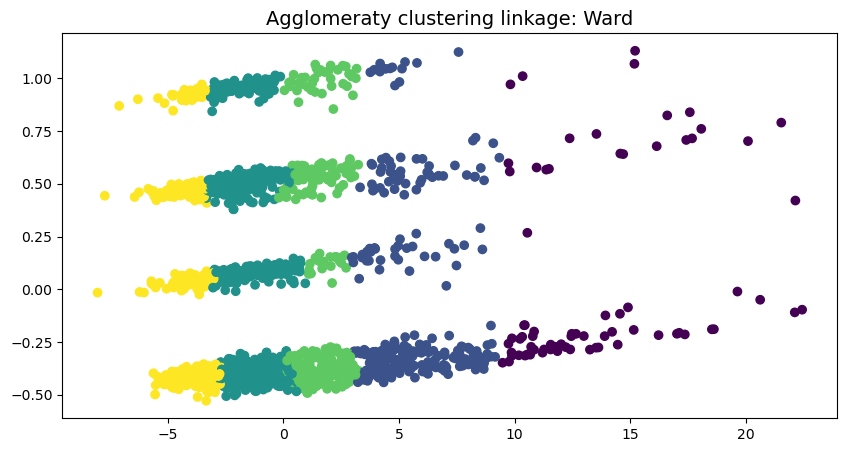

array([0, 1, 2, 3, 4], dtype=int64)

In [511]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
plt.scatter(rates_pca[:,0],rates_pca[:,1], c= ward_euclidean.labels_)
plt.title('Agglomeraty clustering linkage: Ward').set_fontsize(14)
plt.show()
np.unique(ward_euclidean.labels_)

### COMPLETE

Text(0.5, 1.0, 'Dendograma linkage : Complete')

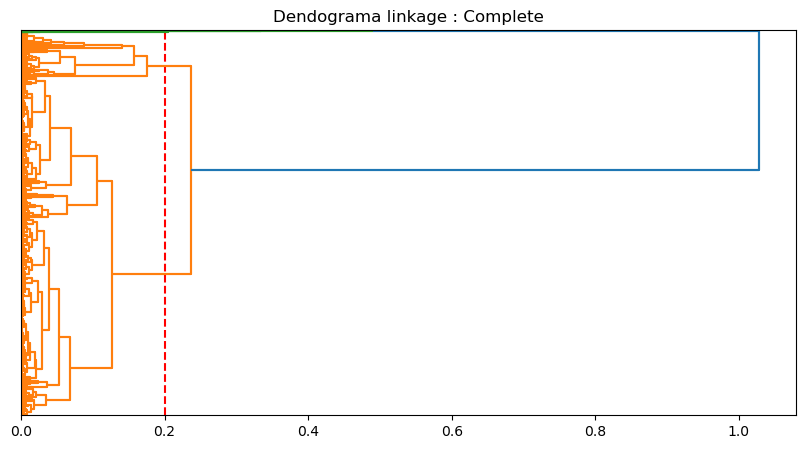

In [512]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
Z = linkage(X, method='complete', metric='cosine') # distancia maxima entre putnos
dn = dendrogram(Z, labels = None,orientation='right')
plt.axvline(x= 0.2, color='r', linestyle='--')
dn = dendrogram(Z, labels = ['' for k in range(0,len(X))], orientation='right')
plt.title('Dendograma linkage : Complete')

In [513]:
distance = 0.1

complete_cosine = AgglomerativeClustering(linkage='complete',
                                affinity='cosine',
                                n_clusters=None,
                                distance_threshold= distance).fit(X)

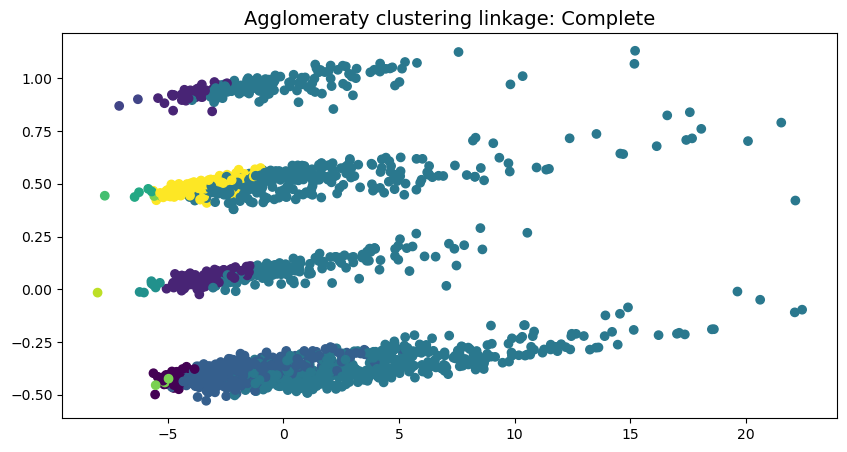

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [515]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
plt.scatter(rates_pca[:,0],rates_pca[:,1], c= complete_cosine.labels_)
plt.title('Agglomeraty clustering linkage: Complete').set_fontsize(14)
plt.show()
np.unique(complete_cosine.labels_)

### Single

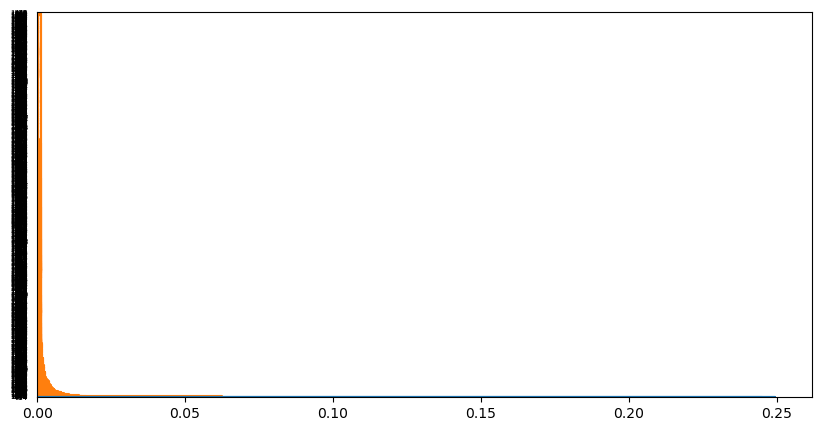

In [516]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
Z = linkage(X, method='single', metric='cosine') # distancia minima entre puntos
dn = dendrogram(Z, labels= None,orientation='right')

In [517]:
distance = 0.0000005
n_clusters = None

single_cosine = AgglomerativeClustering(linkage='single',
                                affinity='cosine',
                                n_clusters=n_clusters,
                                distance_threshold=distance).fit(X)

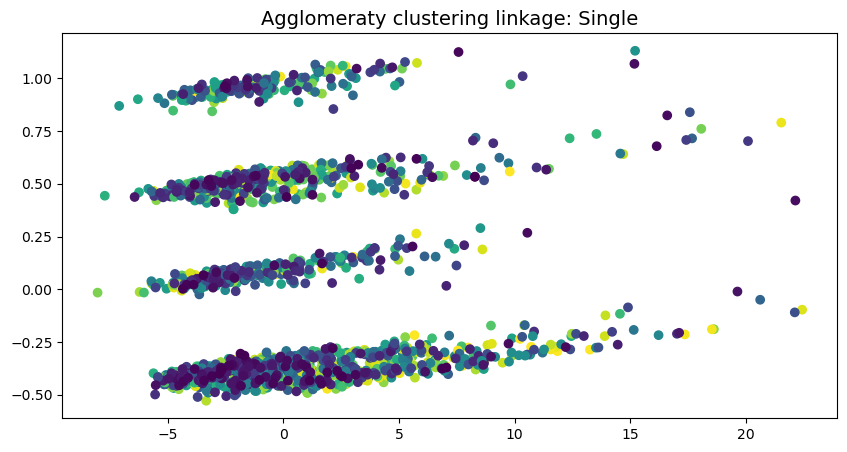

array([   0,    1,    2, ..., 1996, 1997, 1998], dtype=int64)

In [518]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
plt.scatter(rates_pca[:,0],rates_pca[:,1], c= single_cosine.labels_)
plt.title('Agglomeraty clustering linkage: Single').set_fontsize(14)
plt.show()
np.unique(single_cosine.labels_)

### Average

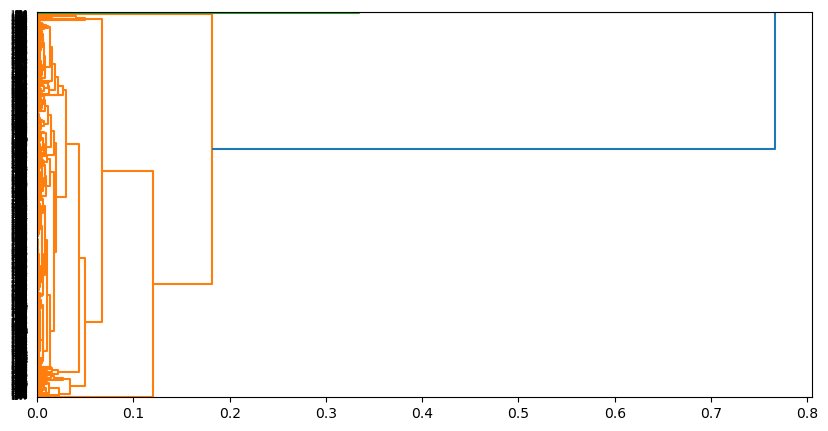

In [519]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
Z = linkage(X, method='average', metric='cosine')
dn = dendrogram(Z, labels= None,orientation='right')

In [520]:
distance = None
n_clusters = 4

average_cosine = AgglomerativeClustering(linkage='average',
                                affinity='cosine',
                                n_clusters=n_clusters,
                                distance_threshold= distance).fit(X)

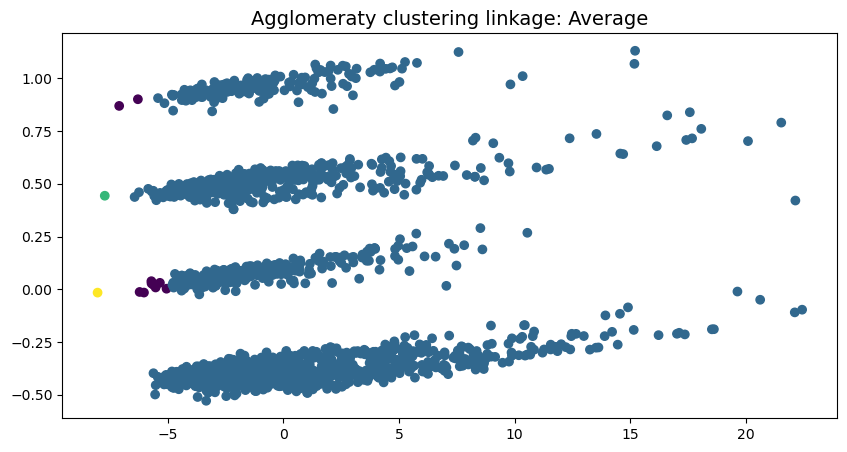

array([0, 1, 2, 3], dtype=int64)

In [521]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
plt.scatter(rates_pca[:,0],rates_pca[:,1], c= average_cosine.labels_)
plt.title('Agglomeraty clustering linkage: Average').set_fontsize(14)
plt.show()
np.unique(average_cosine.labels_)

## DBSCAN

In [593]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

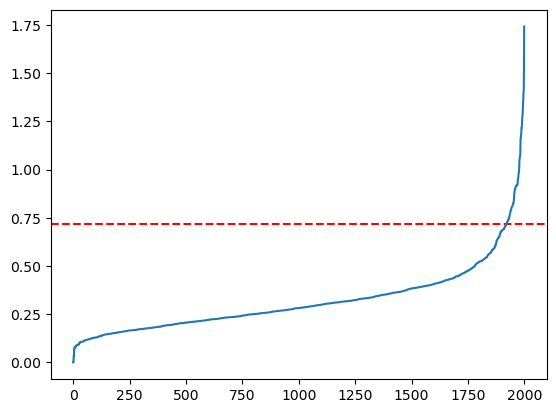

In [594]:
#MEtodo de la rodilla
N = 14
nbrs = NearestNeighbors(n_neighbors=N).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y= 0.72, color='r', linestyle='--') #Ajuste el valor para y
plt.plot(distances)

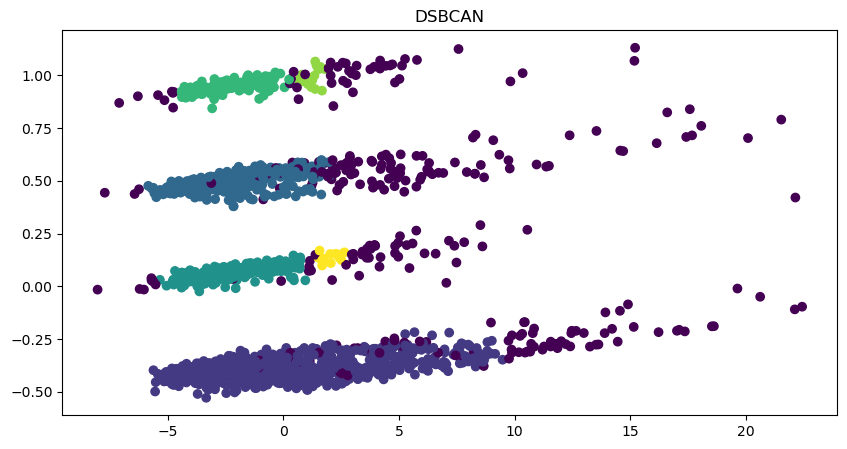

[-1  0  1  2  3  4  5]


In [595]:
dbscan = DBSCAN(eps= 0.72, min_samples= N).fit(X)
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
plt.scatter(rates_pca[:,0], rates_pca[:,1], c = dbscan.labels_)
plt.title('DSBCAN')
plt.show()
print(np.unique(dbscan.labels_))

Se puede ver a continuación la distribución de los cluster's mediante DBSCAN. Se va considerar la clase `-1` corresponde a ruido debido a que no se adaptan a ningún cluster.

In [596]:
np.unique(dbscan.labels_, return_counts = True)

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64),
 array([ 305, 1021,  331,  196,  118,   15,   14], dtype=int64))

In [597]:
dbscan.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

## Metricas de Evaluación

Se evaluan los puntajes de silhoutte de los modelos realizados anteriormente, donde en DBSCAN para obtener un valor más adecuado se decidio filtrar el ruido obtenido al realizar el procedimiento:

In [601]:
from sklearn.metrics import silhouette_score

print("Dataset X K-Means\t", silhouette_score(data_k_means, kmeans.labels_))
print("Dataset X Ward \t", silhouette_score(X, ward_euclidean.labels_))
print("Dataset X Complete\t", silhouette_score(X, complete_cosine.labels_))
print("Dataset X Average \t", silhouette_score(X, average_cosine.labels_))

_filter_label = dbscan.labels_ >= 0

print("Dataset X DBSCAN\t", silhouette_score(X, _filter_label))


Dataset X K-Means	 -0.1439615185444821
Dataset X Ward 	 0.35342647020011275
Dataset X Complete	 -0.013472012191673377
Dataset X Average 	 0.14318456406597108
Dataset X DBSCAN	 0.44081689869630475


## Evaluación de Resultados

Una forma de mirar las diferencias entre cluster's es ver los centroides de cada uno de ellos: 

In [640]:

comp = pd.concat([
                pd.Series(dbscan.labels_, name = "kmeans_predict").to_frame(),
                data_cleaned_sample.Genres], axis = 1)

In [641]:
comp.head()

,kmeans_predict,Genres
0,0.0,NaN
1,1.0,NaN
2,0.0,NaN
3,0.0,NaN
4,1.0,NaN


In [633]:
comp1 = comp['dbscan_predict']==1

In [634]:
comp1.shape

(3972,)

In [635]:

def count_clusters(k):
    dicc = {}
    i = 0
    for row, col in comp[comp['dbscan_predict']== k].iterrows():

        aux = col['Genres']
        if type(aux) == float:
            continue
        aux = aux.split(',')
        for k in aux:
            if k in aux:
                dicc[k] = dicc.get(k,0) + 1
            i+=1
    gen = pd.DataFrame([[key, dicc[key]] for key in dicc.keys()], columns=['Genre', 'Frequency'])
    gen1_5 = gen.sort_values(by = ['Frequency'], ascending=False)
    return gen1_5

In [ ]:
count_clusters(1).shape

(72, 2)

In [636]:
comp[comp['dbscan_predict']== 1]
#pop, hip-hop, rock

,dbscan_predict,Name,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Acousticness,Popularity,Speechiness,Tempo,TimeSignature,Valence,Genres
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
comp[comp['dbscan_predict']== 0].head(50)
#rap, hi-hop

,dbscan_predict,Genres
2,0,"folk rock,mellow gold,soft rock"
3,0,"hip hop,new orleans rap,pop,pop rap,rap,trap m..."
4,0,nyc rap
9,0,"atl hip hop,crunk,dirty south rap,gangster rap..."
10,0,"dance pop,hip hop,hip pop,neo soul,new jack sw..."
15,0,"dance pop,hip pop,neo soul,pop,r&b,urban conte..."
21,0,"country road,outlaw country,red dirt,texas cou..."
22,0,"dancehall,old school dancehall,reggae fusion,r..."
26,0,"chicano rap,g funk,gangster rap,latin hip hop,..."
29,0,"acoustic pop,neo mellow,pop,pop rock"


In [ ]:
comp[comp['dbscan_predict']== 2].head(50)

#alternative rock, rock

,dbscan_predict,Genres
6,2,"comic,pop punk,pop rock,post-grunge,texas pop ..."
12,2,"glam metal,rock"
23,2,"contemporary country,country,country road,mode..."
64,2,"alternative metal,alternative rock,grunge,hard..."
80,2,"dance pop,neo mellow,pop,pop rock,post-teen po..."
133,2,"modern rock,neo mellow,pop,pop punk,pop rock,p..."
153,2,"alternative metal,canadian rock,nu metal,post-..."
189,2,"alternative metal,groove metal,industrial meta..."
235,2,"indie pop,indie rock,indietronica,la indie,mod..."
329,2,"big room,dance pop,deep big room,disco house,d..."


In [ ]:
comp[comp['dbscan_predict']== 3].head(50)

,dbscan_predict,Genres
5,3,"adult standards,easy listening,lounge,vocal jazz"
32,3,"dance pop,folk-pop,neo mellow,pop,pop rock,pos..."
71,3,"adult standards,brill building pop,easy listen..."
75,3,"dance pop,hip hop,hip pop,neo soul,new jack sw..."
151,3,"alternative rock,garage rock,indie folk,indie ..."
171,3,"contemporary country,country,country gospel,co..."
183,3,"country,nashville sound,outlaw country,singer-..."
186,3,"latin pop,puerto rican pop"
192,3,"azonto,dancehall,panamanian pop,reggae fusion,..."
264,3,"country road,outlaw country,red dirt,texas cou..."


Evaluando los centroides se observa que las mayores diferencias entre los cluster's reside en las variables 'Acousticness', 'Energy', 'Loudness' y 'Valence'. Con lo que se puede concluir hasta ahora que evaluando el conjunto [Danceability, Energy, Explicit, Instrumentalness, Liveness, Loudness, Mode, Acousticness, Speechiness, Valence] las estadísticas mencionadas anteriormente son lo que diferencian unos géneros de otros usando K-means.